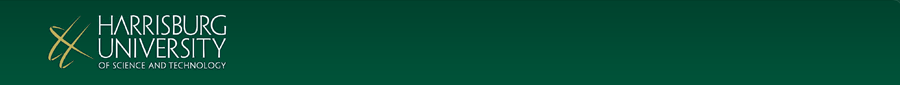
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #03
## Lab Title: Heurisitic Searching
***
### **Instructors**
### Brian Grey M.S.
### Chad Van Chu M.S.
***

# Objectives
#### Searching problems are central to gaining an understanding of Artificial Intelligence. We will be continuing our work from the last class by implementing two classic algorithms central to the concept of modern AI: Dijkstra’s algorithm and the heuristic-based extension, A*. We will construct an algorithm so that, if fed information in the proper format, our algorithm can find the shortest path between two specified points and, potentially, display the state of the search along the way.

#### After completing this lab, you will be able to:

- __Create and implement a novel design for representing a graph__
- __Understand the differences in theory and application between Dijksta’s search algorithm and A*__
- __Understand the principle of an admissible optimistic heuristic__
- __Design and parameterize robust and necessary output__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [https://en.wikipedia.org/wiki/A*_search_algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 340 Lab 03 FA19.ipynb

# Instructions & Questions
Dijkstra and A* both work on directed and undirected connected graphs where edge weights are non-negative. Given this we are going to need to construct a graph of this type and store it within our code. We can then pass this graph to the function which runs the search. The call to the function is to take the form:

`searchXxxxx(Graph g, Node start, Node end, bit robust_output)`

Where `Xxxxx` is the name of the algorithm, `Graph g` is the graph being searched, `Node start` is the starting point, `Node end` is the ending point, and `bit robust_output` represents whether the program will display more output while it is running.
When storing your graph, you will need to store each node within the graph and the connections between the nodes. For this lab, we are going to assume that edge weights are determined by Euclidean distance. Therefore, you will also need to store the coordinate of each node.

For your implementation, you will run a search using Dijkstra and A* on the graph given to determine the shortest path for `Node start` to `Node end`. The program will output the shortest path between the two nodes, the length of the path, and the number of nodes visited for each algorithm.

# <u>Part 1: Design</u>

First, you need to determine certain design aspects regarding your solution.

#### 1. Explain, in detail, how you will store your graph and nodes within your code. Be sure to explain how the data will be structured internally.

How I plan to store my graph and nodes in code is by using dictionaries. I will have 2 dictionaries, one containing the node and its adjacencies, and the other containing the nodes and their coordinates on the graph. Using dictionaries will allow me to better access and modify data than using a data structure like a node or a binary tree. For the adjacency dictionary, I will have each node with its respective ID as its own key and then the data linked to the key will be all of the nodes adjacencies. Those adjacencies will be defined with their respective ID's. For the coordinate dictionary it will be the same structure as the adjacency dictionary except that the data will be their respective coordinate on the grid.


#### 2. Explain, in detail, what additional information you will display when the <i>robust_output</i> flag is set to true. Information may be displayed before the search algorithm starts, during each iteration of searching, or after the search algorithm completes. Be sure to include when your additional data will be displayed.

What I plan to include in the output if robust_output is True is the list of all the nodes that were visited in the sequence in order of first to last visited, the shortest path from the start node to the end node, the length of the shortest path, the length of the total sequence, and the number of nodes visited. All of this detail will be printed out with the output. 

# <u>Part 2: Concept</u>


#### 3. Translate the following maze into your graph storage methodology. You may document this using conceptual representations or code-based representations. Be sure to include “dead end” nodes in your graph.

![Maze](maze.png)

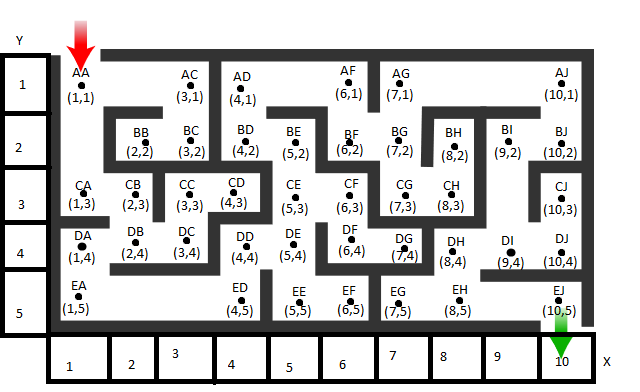

In [ ]:
nodes = ['AA', 'AC', 'AD', 'AF', 'AG', 'AJ', 
         'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ',
         'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CJ',
         'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ',
         'EA', 'ED', 'EE', 'EF', 'EG', 'EH', 'EJ']
graph ={
    'AA': {'AC','CA'},'AC': {'BC','AA'},'AD': {'AF','BD'},'AF': {'BF','AD'},'AG': {'AJ','BG'},'AJ': {'BJ','AG'},
    'BB': {'BC'},'BC': {'BB','AC'},'BD': {'AD','BE'},'BE': {'BD','CE'},'BF': {'BG','AF'},'BG': {'AG','CG','BF'},'BH': {'CH'},'BI': {'DI','BJ'},'BJ': {'BI','AJ'},
    'CA': {'CB','AA'},'CB': {'DB','CA'},'CC': {'CD','DC'},'CD': {'CC'},'CE': {'BE','CF','DE'},'CF': {'DF','CE'},'CG': {'CH','BG'},'CH': {'BH','CG'},'CJ': {'DJ'},
    'DA': {'DB','EA'},'DB': {'CB','DA','DC'},'DC': {'DB','CC'},'DD': {'ED','DE'},'DE': {'DD','CE','EE'},'DF': {'CF','DG'},'DG': {'DF'},'DH': {'DI','EH'},'DI': {'BI','DH','DJ'},'DJ': {'DI','CJ'},
    'EA': {'DA','ED'},'ED': {'EA','DD'},'EE': {'DE','EF'},'EF': {'EE'},'EG': {'EH'},'EH': {'DH','EG','EJ'},'EJ': {'EH'}
    }

node_coords={
    'AA': (1,1),'AC': (3,1),'AD': (4,1),'AF': (6,1),'AG': (7,1),'AJ': (10,1),
    'BB': (2,2),'BC': (3,2),'BD': (4,2),'BE': (5,2),'BF': (6,2),'BG': (7,2),'BH': (8,2),'BI': (9,2),'BJ': (10,2),
    'CA': (1,3),'CB': (2,3),'CC': (3,3),'CD': (4,3),'CE': (5,3),'CF': (6,3),'CG': (7,3),'CH': (8,3),'CJ': (10,3),
    'DA': (1,4),'DB': (2,4),'DC': (3,4),'DD': (4,4),'DE': (5,4),'DF': (6,4),'DG': (7,4),'DH': (8,4),'DI': (9,4),'DJ': (10,4),
    'EA': (1,5),'ED': (4,5),'EE': (5,5),'EF': (6,5),'EG': (7,5),'EH': (8,5),'EJ': (10,5)
    }


# <u>Part 3: Implementation</u>


#### 4.	Implement your solution for the `searchDijsktra` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [ ]:
from queue import PriorityQueue
import math

def searchDijsktra(graph, start_node, end_node, robust_output):
    # List of all nodes, will remove current node after bring visited
    unvisited_nodes = [nodes]
    visited_nodes = []
    # Dictionary of distances between nodes
    # Sets the start_node distance to 0
    distance = {node: float('inf') for node in graph}
    distance[start_node] = 0
    # Dictionary to keep track of the shortest path between start and end
    shortest_path = {}
    curr_node = start_node
    
    # main loop; will loop until all nodes are visited
    while unvisited_nodes or curr_node != end_node:
            
        curr_coords = node_coords[curr_node]
        min_dist_adj = None
        
        # Takes the curr_node and checks its adjacencies for distance
        for adj in graph[curr_node]:
            # calculate the distance between the curr_node and the adjacency and then updates distance dictionary
            adj_coords = node_coords[adj]
            new_distance = distance[curr_node] + calc_move_cost(curr_coords, adj_coords)
            if new_distance < distance[adj]:
                distance[adj] = new_distance
                shortest_path[adj] = curr_node
            if (min_dist_adj == None or distance[adj]<min_distance) and adj in unvisited_nodes:
                min_distance = distance[adj]
                min_dist_adj = adj
        
        # If at dead end
        if min_dist_adj == None:
            visited_nodes.append(curr_node)
            unvisited_nodes.pop(curr_node)
            x = -2 
            #Go backwards until an nodes adjacency isnt visited
            #Last visited node
            while visited_nodes:
                last = visited_nodes[x]
                for adj in graph[last]:
                    if adj in unvisited_nodes:
                        curr_node = adj
                        break
                    else:
                        x-=1
                else:
                    continue
                
                break
         
        # If function works as intended   
        else:
            visited_nodes.append(curr_node)
            unvisited_nodes.pop(curr_node)
            curr_node = min_dist_adj
    
    path = []
    while curr_node in shortest_path:
        path.insert(0, curr_node)
        curr_node = shortest_path[curr_node]
    path.insert(0, start_node) 
    if robust_output == True:
        return path, len(path), visited_nodes, len(visited_nodes) 
    else:
        return path, len(path), len(visited_nodes) 
        
# Helper Function
def calc_move_cost(node1, node2):
    x1, y1 = node_coords[node1]
    x2, y2 = node_coords[node2]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)


#### 5. Implement your solution for the `searchAStar` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [ ]:
from queue import PriorityQueue
import math

def searchAStar(graph, start, end, robust_output):
    open = PriorityQueue()
    open.put((0, start))
    closed = []
    shortest_path = {}
    g = {node: float('inf') for node in graph}
    g[start] = 0
    f = {node: float('inf') for node in graph}
    f[start] = calc_move_cost(node_coords[start], node_coords[end])
    
    while not open.empty():
        curr_f, curr_node = open.get()
        if curr_node == end:
            break #output
        closed.append(curr_node)
        for adj in graph[curr_node]:
            if adj not in open:
                continue
            adj_g_score = g[curr_node] + calc_move_cost(node_coords[curr_node], node_coords[adj]) 
            if adj_g_score < g[adj]:
                shortest_path[adj] = curr_node
                g[adj] = adj_g_score
                f[adj] = adj_g_score + calc_move_cost(node_coords[adj], node_coords[end])
                open.put((f[adj], adj))
    
    path = []
    node = end
    while node in shortest_path:
        shortest_path.insert(0, node)
        node = shortest_path[node]
    path.insert(0, start)
    if robust_output == True:
        return path, len(path), closed, len(closed)
    else:
        return path, len(path), len(closed)    
        
# Helper Function
def calc_move_cost(node1, node2):
    x1, y1 = node_coords[node1]
    x2, y2 = node_coords[node2]
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)


#### 6.	How does the performance of your `searchDijsktra` function compare with the performance of the `searchAStar` function? Explain, in detail, with whatever relevant data you have from your code.

My searchAStar function seemed to be more efficent than my searchDijsktra looking at the amount of nodes visited but since most of the connections in my maze had a connection weight of 1 it was mostly the same between the 2.  